Found 43954 images belonging to 10 classes.
Found 14651 images belonging to 10 classes.
Found 14652 images belonging to 10 classes.
Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 318s 461ms/step - accuracy: 0.1825 - loss: 2.2512 - val_accuracy: 0.1903 - val_loss: 2.2351
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 320s 465ms/step - accuracy: 0.2432 - loss: 2.1096 - val_accuracy: 0.6324 - val_loss: 1.1861
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 322s 469ms/step - accuracy: 0.6788 - loss: 1.0584 - val_accuracy: 0.7251 - val_loss: 0.9176
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 344s 501ms/step - accuracy: 0.7484 - loss: 0.8279 - val_accuracy: 0.7911 - val_loss: 0.7057
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 326s 475ms/step - accuracy: 0.8068 - loss: 0.6368 - val_accuracy: 0.8199 - val_loss: 0.6119
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 327s 476ms/step - accuracy: 0.8435 - loss: 0.5246 - val_accuracy: 0.8322 - val_loss: 0.5631
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 331s 481ms/step - accuracy: 0.8662 -

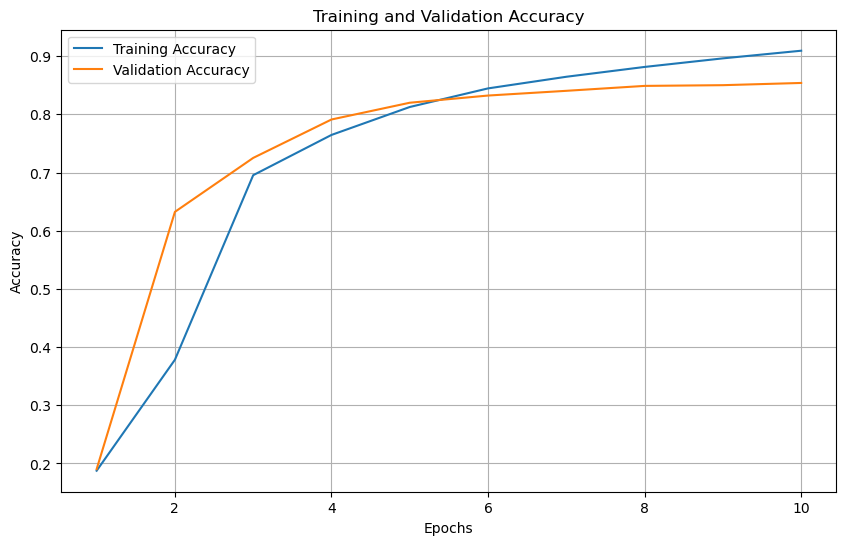

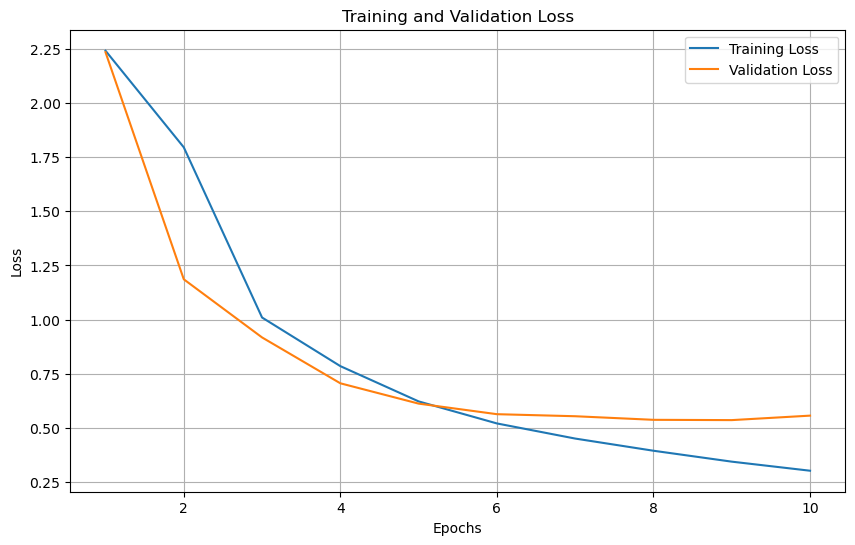

In [ ]:
import tensorflow as tf
from alexnet_model import AlexNet
import matplotlib.pyplot as plt

def train_alexnet():
    # Data Generators (Normalization Only)
    train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    valid_test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Loading Training, Validation, and Test Data
    train_generator = train_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/train',
        batch_size=64,
        class_mode='categorical',
        shuffle=True
    )
    validation_generator = valid_test_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/val',
        batch_size=64,
        class_mode='categorical',
        shuffle=True
    )
    test_generator = valid_test_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/test',
        batch_size=64,
        class_mode='categorical',
        shuffle=False
    )
    
    # Define AlexNet Model
    num_classes = 10
    model = AlexNet(num_classes=num_classes)
    
    # Learning Rate Scheduler
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=0.005,
        decay_steps=10000,
        alpha=0.0001
    )
    
    # Optimizer
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=lr_schedule,
        momentum=0.9,
        nesterov=True
    )
    
    # Compile the Model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Training the Model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=[
            tf.keras.callbacks.ModelCheckpoint(
                'alexnet_checkpoint.keras',  # Save the best model checkpoint
                save_best_only=True,
                monitor='val_accuracy'
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=5,               # Stop training if val_loss doesn't improve for 5 epochs
                restore_best_weights=True
            )
        ]
    )
    
    # Save Final Weights
    model.save_weights('alexnet_final.weights.h5')
    
    # Evaluate on Test Data
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return model, history

# Plotting Function (Separated from Training)
def plot_training_results(history):
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Train the model
    model, history = train_alexnet()
    
    # Plot the training results (AFTER training completes)
    plot_training_results(history)